In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection

# Load data

In [2]:
# Mikel path
#data = pd.read_csv('/Users/mikelyu/Desktop/Uni/02455 Statistical Evaluation/02455-projects/HR_data.csv')

# Karl path
df = pd.read_csv(r"C:\desktop\02455-projects\HR_data.csv")

# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0    HR_Mean  HR_Median    HR_std  HR_Min  HR_Max     HR_AUC  \
0           0  77.965186      78.00  3.345290   73.23   83.37  22924.945   
1           1  70.981097      70.57  2.517879   67.12   78.22  21930.400   
2           2  73.371959      73.36  3.259569   67.88   80.22  21647.085   
3           3  78.916822      77.88  4.054595   72.32   84.92  25258.905   
4           4  77.322226      74.55  6.047603   70.52   90.15  23890.565   

     Round   Phase  Individual  Puzzler  Frustrated Cohort  
0  round_3  phase3           1        1           1   D1_1  
1  round_3  phase2           1        1           5   D1_1  
2  round_3  phase1           1        1           0   D1_1  
3  round_2  phase3           1        1           1   D1_1  
4  round_2  phase2           1        1           5   D1_1  


In [3]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0    0
HR_Mean       0
HR_Median     0
HR_std        0
HR_Min        0
HR_Max        0
HR_AUC        0
Round         0
Phase         0
Individual    0
Puzzler       0
Frustrated    0
Cohort        0
dtype: int64


No missing values.

In [4]:
for column in df.columns:
    globals()[column] = df[column].tolist()

# visualization

(array([29., 45., 31., 16.,  0., 23., 14.,  5.,  2.,  3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

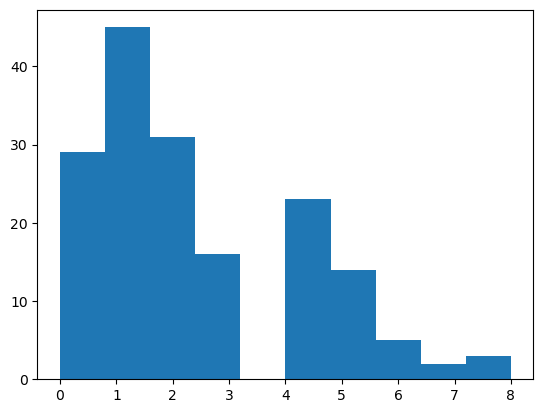

In [5]:
plt.hist(Frustrated)

Frustration is discrete variable. Therefore, each value from 0-10 can be seen as a discrete and separated value. We can thus view this as a classification problem. Therefore, we will attempt to fit two classification models to the data.

# Models

## Classification

In [6]:
# Display the first few rows of the dataframe
print(df.head())

# Display information about the dataframe
print(df.info())

X = df.drop(["Unnamed: 0",'Frustrated',"Individual","Puzzler","Cohort","Phase","Round"], axis=1)

X

   Unnamed: 0    HR_Mean  HR_Median    HR_std  HR_Min  HR_Max     HR_AUC  \
0           0  77.965186      78.00  3.345290   73.23   83.37  22924.945   
1           1  70.981097      70.57  2.517879   67.12   78.22  21930.400   
2           2  73.371959      73.36  3.259569   67.88   80.22  21647.085   
3           3  78.916822      77.88  4.054595   72.32   84.92  25258.905   
4           4  77.322226      74.55  6.047603   70.52   90.15  23890.565   

     Round   Phase  Individual  Puzzler  Frustrated Cohort  
0  round_3  phase3           1        1           1   D1_1  
1  round_3  phase2           1        1           5   D1_1  
2  round_3  phase1           1        1           0   D1_1  
3  round_2  phase3           1        1           1   D1_1  
4  round_2  phase2           1        1           5   D1_1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC
0,77.965186,78.000,3.345290,73.23,83.37,22924.945
1,70.981097,70.570,2.517879,67.12,78.22,21930.400
2,73.371959,73.360,3.259569,67.88,80.22,21647.085
3,78.916822,77.880,4.054595,72.32,84.92,25258.905
4,77.322226,74.550,6.047603,70.52,90.15,23890.565
...,...,...,...,...,...,...
163,73.594539,72.380,9.474556,57.43,93.53,21482.985
164,57.839897,54.130,6.796647,52.97,74.14,16825.740
165,64.237295,65.195,3.589241,58.97,72.63,18691.065
166,70.834320,70.440,2.391160,66.65,76.07,20753.005


In [7]:
y = df['Frustrated']

In [9]:
from sklearn.preprocessing import StandardScaler

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Check mean and standard deviation
print(X[numeric_columns].mean())
print(X[numeric_columns].std())


HR_Mean      2.379049e-16
HR_Median   -7.797995e-16
HR_std      -4.229421e-17
HR_Min      -8.035900e-16
HR_Max      -1.015061e-15
HR_AUC      -3.700743e-16
dtype: float64
HR_Mean      1.00299
HR_Median    1.00299
HR_std       1.00299
HR_Min       1.00299
HR_Max       1.00299
HR_AUC       1.00299
dtype: float64


In [10]:
for i in range(len(y)):

    if y[i] > 3.5:
        y[i] = 1
    else:
        y[i] = 0

C:\Users\karlj\AppData\Local\Temp\ipykernel_7816\2507873558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0
C:\Users\karlj\AppData\Local\Temp\ipykernel_7816\2507873558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1
C:\Users\karlj\AppData\Local\Temp\ipykernel_7816\2507873558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0
C:\Users\karlj\AppData\Local\Temp\ipykernel_7816\2507873558.py:6: SettingWit

In [15]:
X_R = []
for i in range(14):
    globals()[f'individual_{i}'] = X[(i*12):((i+1)*12)]
    X_R.append(globals()[f'individual_{i}'])

In [12]:
'''
loo = LeaveOneOut()

# Initialize lists to hold results
y_true = []
y_pred = []


# Perform LOOCV
for train_index, test_index in CV.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test.values[0])

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')
'''

"\nloo = LeaveOneOut()\n\n# Initialize lists to hold results\ny_true = []\ny_pred = []\n\n\n# Perform LOOCV\nfor train_index, test_index in CV.split(X, y):\n    X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n    y_train, y_test = y.iloc[train_index], y.iloc[test_index]\n\n    # Initialize and train the model\n    model = RandomForestClassifier(n_estimators=100, random_state=42)\n    model.fit(X_train, y_train)\n\n    # Make predictions\n    y_pred.append(model.predict(X_test)[0])\n    y_true.append(y_test.values[0])\n\n# Calculate accuracy\naccuracy = accuracy_score(y_true, y_pred)\nprint(f'Accuracy: {accuracy:.4f}')\n"

In [16]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

groups = 

# Model
model = RandomForestClassifier()

# GroupKFold with n_splits=14 (equivalent to Leave-One-Group-Out)
group_kfold = GroupKFold(n_splits=14)

# Cross-Validation Scores
scores = cross_val_score(model, X, y, cv=group_kfold, groups=groups)

# Display Scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))


ValueError: Found input variables with inconsistent numbers of samples: [168, 168, 14]

# old stuff

In [ ]:
loo = LeaveOneOut()

# Initialize lists to hold results
y_true = []
y_pred = []

# Perform LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the logistic regression model
    model = LogisticRegression(random_state=42, max_iter=100000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test.values[0])

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5952


In [ ]:
X

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Frustrated,Puzzler_1,Cohort_D1_2
0,0.261529,0.393515,-0.633659,0.827134,-0.447257,-0.132333,3,3,-1.612452,-0.673073,True,False
1,-0.672305,-0.526346,-0.828136,-0.043110,-0.851924,-0.410224,3,2,-1.612452,1.411282,True,False
2,-0.352626,-0.180934,-0.653808,0.065136,-0.694772,-0.489387,3,1,-1.612452,-1.194162,True,False
3,0.388771,0.378658,-0.466943,0.697523,-0.325464,0.519811,2,3,-1.612452,-0.673073,True,False
4,0.175560,-0.033608,0.001497,0.441150,0.085489,0.137476,2,2,-1.612452,1.411282,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
163,-0.322865,-0.302261,0.806974,-1.423252,0.351076,-0.535239,4,2,1.612452,2.974548,False,True
164,-2.429398,-2.561676,0.177554,-2.058487,-1.172515,-1.836545,4,1,1.612452,-1.194162,False,True
165,-1.574010,-1.191790,-0.576321,-1.203910,-1.291165,-1.315344,1,3,1.612452,-0.673073,False,True
166,-0.691930,-0.542440,-0.857920,-0.110052,-1.020863,-0.739206,1,2,1.612452,0.890193,False,True


In [ ]:
model.coef_

array([[ 0.12775198,  0.02899625, -0.08098709, -0.43616046, -0.24395096,
        -0.06027043, -0.02882839,  0.15324383, -0.20923535,  4.13651114,
        -0.06811392,  0.30905583]])